## Homework
---
> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In [5]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Dataset
In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able link:
> wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').

In [6]:
# url of the dataset
data_laptop = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

# using wget to download the dataset
!wget $data_laptop

--2024-10-08 01:55:55--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.4’

laptops.csv.4       100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-08 01:55:55 (7.06 MB/s) - ‘laptops.csv.4’ saved [298573/298573]



In [7]:
df = pd.read_csv('laptops.csv')
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


### Preparing the dataset

First, we'll normalize the names of the columns:



In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [9]:
print(df.shape)

(2160, 12)


In [10]:
# use only the column 'ram', 'storage', 'screen', 'final_price
base = ['ram', 'storage', 'screen', 'final_price']
df = df[base]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

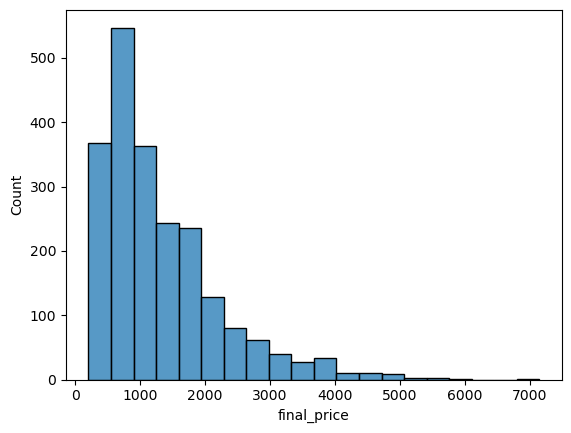

In [11]:
sns.histplot(df.final_price, bins=20)

In [12]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

>Answer for number 1 is 'screen' column with 4 data missing

In [13]:
# initializing the descriptive analysis
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
ram,2160.0,15.413889,9.867815,4.00,4.00,8.00,8.0000,16.000,16.00,32.000,32.0000,64.0000,128.00
storage,2160.0,596.294444,361.220506,0.00,0.00,256.00,256.0000,512.000,1000.00,1000.000,1000.0000,2000.0000,4000.00
screen,2156.0,15.168112,1.203329,10.10,10.10,13.40,14.0000,15.600,15.60,16.100,17.3000,17.3000,18.00
final_price,2160.0,1312.638509,911.475417,201.05,201.05,449.99,661.0825,1031.945,1708.97,2518.038,3199.0005,4499.4059,7150.47


In [14]:
# inspecting the median
np.median(df['ram'])

16.0

>Answer for number 2 is 16

### Prepare and Split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

/tmp/ipykernel_1393108/2998325694.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=100, ax=ax, layout=(3, 3), column=base)


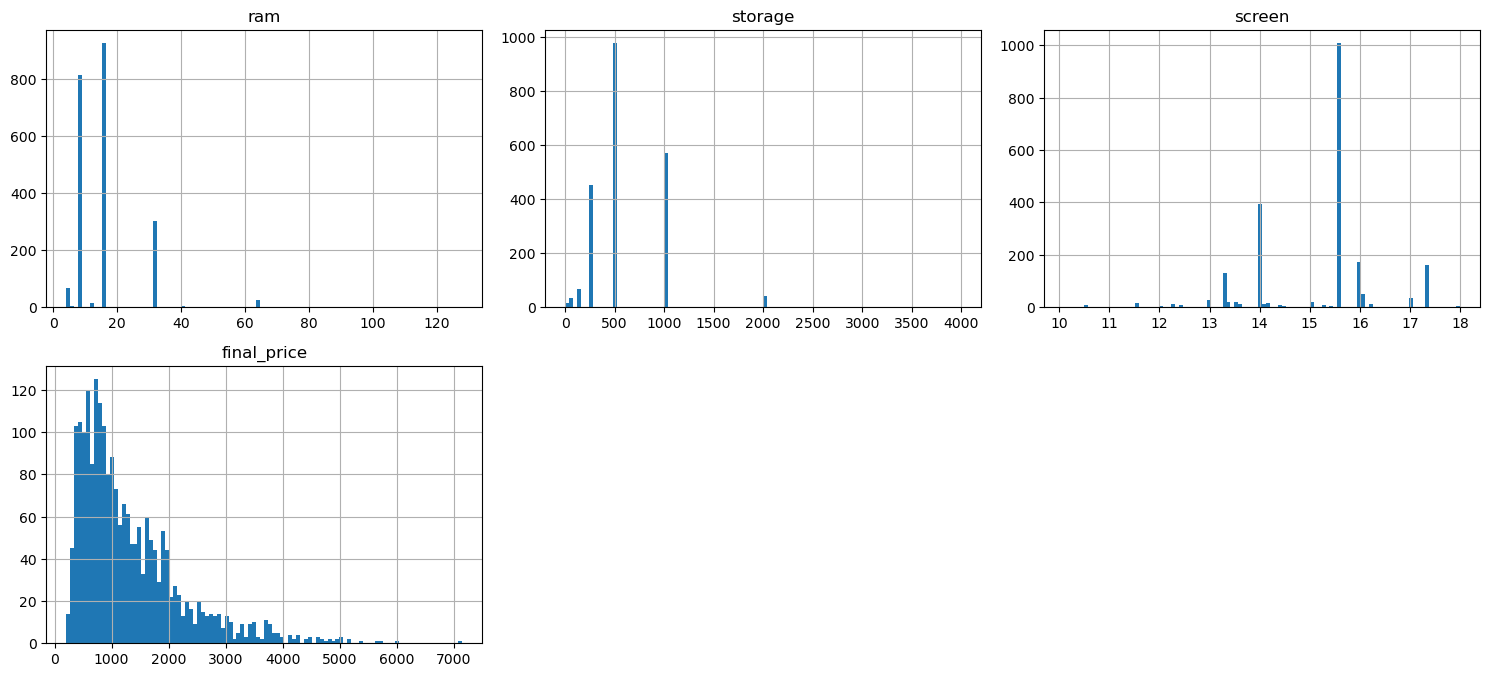

In [15]:
# inspecting the histogram
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=base)
plt.tight_layout()
plt.show()

### Simple Linear Regression

In [16]:
#function for simple linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Dataset preparation

In [17]:
# splitting the dataset into train, validation and test
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# shuffling the dataset using random seed 42
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [18]:
# preparing the dataset 
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
# preparing the labels
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [20]:
# deleting the target column in the prepared dataset
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [21]:
#preparing the dataset
check = ['ram', 'storage', 'screen']

# defining the function
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [22]:
# function for rmse
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Filling the missing values using the mean

In [23]:
mean = df_train['screen'].mean()

# preparing the dataset for training
X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

#preparing the dataset for validation
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

# getting the rmse
np.round(rmse(y_val, y_mean_pred_val),2)


600.27

### Filling the missing values with 0

In [24]:
# preparing the dataset for training
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

#preparing the dataset for validation
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

# getting the rmse
np.round(rmse(y_val, y_null_pred_val),2)

597.36

> Answer for number 3, filling it with 0

### Regularization

In [25]:
# function for training linear regression with regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [26]:
# inspecting the results using different values of r
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 676.8954853003471 597.36
0.01 676.2736817204672 597.36
0.1 670.7284836313021 597.35
1 619.9030834107807 597.21
5 463.77716971415225 597.01
10 352.79713367676436 597.06
100 66.92071440180734 597.9


> Answer for number 4 is 0

### Seed Checking

> Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [27]:
# checking for the rmse scores
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 547.5696230184624 565.45
1 594.4197427998372 636.8
2 649.4685454768363 588.96
3 571.9459040111583 597.81
4 629.3882030644238 571.96
5 580.7647373329446 573.24
6 783.7683689904087 647.34
7 376.43586006224785 550.44
8 572.8852361196888 587.33
9 663.379279260705 576.1


In [28]:
# inspecting the rmse list
rmse_list

[565.45, 636.8, 588.96, 597.81, 571.96, 573.24, 647.34, 550.44, 587.33, 576.1]

In [29]:
# inspecting the standard deviation for the rmse list
np.round(np.std(rmse_list),3)

29.176

### Seed and Regularization

In [31]:
# initializing seed and regularization
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val = df_train_val.final_price.values
y_test = df_test.final_price.values


del df_train_val['final_price']
del df_test['final_price']

In [32]:
# inspecting the rmse
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

608.61

> Answer for number 6 is 608.6